## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

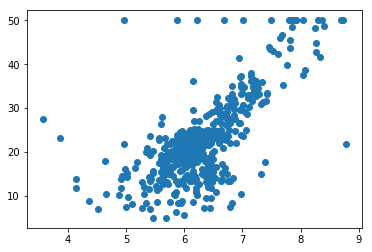

In [6]:
draw_rm_and_price()

In [7]:
import random

In [8]:
def price(rm, k, b):
    return rm * k + b

In [9]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

###### 1. Random Choose Method to get optimal *k* and *b*

In [10]:
X_rm = X[:,5]

In [11]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -8.20323054591374 best_b: -81.86496590200538, and the loss is: 24512.200662674622
When time is : 3, get best_k: -32.418223846783604 best_b: 88.44632687423794, and the loss is: 19888.201059835133
When time is : 5, get best_k: 13.872281695752875 best_b: -19.15509148910985, and the loss is: 2124.5448302625355
When time is : 16, get best_k: 6.806115166823872 best_b: 4.904583114129693, and the loss is: 678.505183309741
When time is : 21, get best_k: -0.09773352193616347 best_b: 0.07060350865005205, and the loss is: 617.8221117752221
When time is : 31, get best_k: 8.238450673293187 best_b: -8.563671520877179, and the loss is: 471.59623348282895
When time is : 71, get best_k: 11.257577979627612 best_b: -56.29001879133702, and the loss is: 111.063989792964
When time is : 164, get best_k: 6.313410677286214 best_b: -11.440698260932393, and the loss is: 79.96747370206468
When time is : 377, get best_k: 12.502601095169695 best_b: -56.93058414584509, and the loss is: 5

###### 2.Supervised Direction to get optimal *k* and *b*

In [12]:
import random
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:  # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        #print(i)
        next_direction = random.choice(direction)

When time is : 0, get best_k: -97.24683362783367 best_b: -64.17719727801486, and the loss is: 492639.6826232457
When time is : 1, get best_k: -96.24683362783367 best_b: -63.17719727801486, and the loss is: 482420.978755923
When time is : 2, get best_k: -95.24683362783367 best_b: -62.17719727801486, and the loss is: 472309.39207534736
When time is : 3, get best_k: -94.24683362783367 best_b: -61.17719727801486, and the loss is: 462304.92258151853
When time is : 4, get best_k: -93.24683362783367 best_b: -60.17719727801486, and the loss is: 452407.5702744375
When time is : 5, get best_k: -92.24683362783367 best_b: -59.17719727801486, and the loss is: 442617.33515410236
When time is : 6, get best_k: -91.24683362783367 best_b: -58.17719727801486, and the loss is: 432934.21722051536
When time is : 7, get best_k: -90.24683362783367 best_b: -57.17719727801486, and the loss is: 423358.21647367487
When time is : 8, get best_k: -89.24683362783367 best_b: -56.17719727801486, and the loss is: 413889

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: a complicated formula is hard to design and also not easy for maintainence, but machine learning are self adjusting and much easier for people to get a approximate accurete result.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: this method is not time-efficient

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: yes, the 2nd supervised direction method did get the next right direction to reduce loss, it has only 4 direction choices and it's reduce is limited

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: see assignment 3

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: see assignment 3

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:see assignment 3

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: see assignment 3

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [13]:
import requests
def check_link(url):    
    header = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    try:              
        r = requests.get(url,headers=header).content.decode('utf8')                 
        return r  
    except:       
        print('无法链接服务器！！！')

In [14]:
from urllib import parse
import hashlib
 
def get_urt(address):
 
    # 以get请求为例http://api.map.baidu.com/geocoder/v2/?address=百度大厦&output=json&ak=你的ak
    queryStr = '/geocoding/v3/?address=%s&output=json&ak=NEoBOOLqOLzTfZwtzwygtqtQg3MDEFbH&callback=showLocation ' %address
  #  queryStr = '/geocoder/v2/?address=%s&output=json&ak=NEoBOOLqOLzTfZwtzwygtqtQg3MDEFbH' % address
 
    # 对queryStr进行转码，safe内的保留字符不转换
    encodedStr = parse.quote(queryStr, safe="/:=&?#+!$,;'@()*[]")
 
    # 在最后直接追加上yoursk
    rawStr = encodedStr + 'vaMit8jgmlRg24I6kBL1I1mK0zjB6Kdk'
 
    #计算sn
    sn = (hashlib.md5(parse.quote_plus(rawStr).encode("utf8")).hexdigest())
     
    #由于URL里面含有中文，所以需要用parse.quote进行处理，然后返回最终可调用的url
    url = parse.quote("http://api.map.baidu.com"+queryStr+"&sn="+sn, safe="/:=&?#+!$,;'@()*[]")   
     
    return url

In [15]:
url = get_urt("天安门西站")

In [57]:
import json
def get_location(url):
    response = json.loads(check_link(url))
    location = response['result']['location']
    return tuple([v for k, v in location.items()])

In [61]:
json.loads(check_link(get_urt("动物园站")))

{'status': 1, 'msg': 'Internal Service Error:无相关结果', 'results': []}

In [18]:
get_location(get_urt("亦庄站"))

<class 'dict'>


(116.60819836058009, 39.819355595064636)

In [22]:
from bs4 import BeautifulSoup as BS
import requests
import csv
import bs4
import re

In [20]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

In [21]:
url = "https://baike.baidu.com/item/北京地铁/408485"

In [24]:
html = requests.get(url, headers=headers).content.decode('utf8')

In [25]:
soup = BS(html)

In [26]:
xianlu = str(soup.find_all('table', attrs={"log-set-param":"table_view","data-sort":"sortDisabled"})[2:])

In [23]:
#simple_soup = str(soup.find_all('table',attrs={"log-set-param":"table_view"})[4])

In [27]:
what_we_want = r'href="(/item/[%\w]+)"\s+target="\_blank">(\w+线)</a>'
pattern = re.compile(what_we_want)

In [28]:
lines = pattern.findall(xianlu)

In [29]:
def remove_duplicate(line):
    l2 = []
    for i in line: 
        if not i in l2: 
            l2.append(i) 
    return l2

In [30]:
lines = remove_duplicate(lines)

In [31]:
lines

[('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF', '北京地铁2号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF', '北京地铁4号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF', '北京地铁5号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF', '北京地铁6号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF', '北京地铁7号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF', '北京地铁9号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
  '北京地铁10号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
  '北京地铁13号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
  '北京地铁14号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
  '北京地铁15号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF',
  '北京地铁16号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9

In [32]:
def check_link(url):    
    header = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    try:        
        
        r = requests.get(url,headers=header).content.decode('utf8')                 
        return r  
    except:       
        print('无法链接服务器！！！')

In [33]:
def get_contents(ulist,rurl):   
    soup = BeautifulSoup(rurl,'lxml')  
    trs = soup.find_all('tr')    
    for tr in trs:        
        ui = []        
        for td in tr:            
            ui.append(td.string)        
            ulist.append(ui)

In [34]:
def get_stations(items):
    time = r"\d+:\d{2}$"
    station = r"\w+"
    pattern = re.compile(time)
    pattern1 = re.compile(station)
    
    station = []
    for item in items:
        found = 0
        if len(item) >= 5:
            #print(">5",item)
            for word in item:
                if pattern.match(str(word)):
                    found = 1
                    break
            if found == 1 and pattern1.match(str(item[0])):
                #print(item[0])
                add = str(item[0]) 
                if not str(item[0]).endswith("站"):
                    add +="站" 
                station.append(add)    
    return station     

In [35]:
def get_stations_from_url(url):
    urlr = check_link(url)
    ulist = []
    get_contents(ulist,urlr)
    ulist = get_stations(remove_duplicate(ulist))
    return ulist

In [36]:
url_head = "https://baike.baidu.com"
lines_stations = {}
for url, name in lines:
    url = url_head + url
    stations = get_stations_from_url(url)
    lines_stations[name] = stations

In [37]:
# 亦庄线独立处理
url = "https://baike.baidu.com/item/北京地铁亦庄线"
name = "北京地铁亦庄线"
what_we_want1 = r'<a target=_blank\s+href="/item/[/%\w]+"(?:\s+\w+\-\w+="\d+")*>(\w+站)</a>'
pattern1 = re.compile(what_we_want1)
html = requests.get(url, headers=headers).content.decode('utf8')
stations = pattern1.findall(html)
stations = remove_duplicate(stations)
lines_stations[name] = stations

In [38]:
lines_stations

{'北京地铁1号线': ['苹果园站',
  '古城站',
  '八角游乐园站',
  '八宝山站',
  '玉泉路站',
  '五棵松站',
  '万寿路站',
  '公主坟站',
  '军事博物馆站',
  '木樨地站',
  '南礼士路站',
  '复兴门站',
  '西单站',
  '天安门西站',
  '天安门东站',
  '王府井站',
  '东单站',
  '建国门站',
  '永安里站',
  '国贸站',
  '大望路站',
  '四惠站',
  '四惠东站'],
 '北京地铁2号线': ['西直门站',
  '积水潭站',
  '鼓楼大街站',
  '安定门站',
  '雍和宫站',
  '东直门站',
  '东四十条站',
  '朝阳门站',
  '建国门站',
  '北京站',
  '崇文门站',
  '前门站',
  '和平门站',
  '宣武门站',
  '长椿街站',
  '复兴门站',
  '阜成门站',
  '车公庄站'],
 '北京地铁4号线': ['安河桥北站',
  '北宫门站',
  '西苑站',
  '圆明园站',
  '北京大学东门站',
  '中关村站',
  '海淀黄庄站',
  '人民大学站',
  '魏公村站',
  '国家图书馆站',
  '动物园站',
  '西直门站',
  '新街口站',
  '平安里站',
  '西四站',
  '灵境胡同站',
  '西单站',
  '宣武门站',
  '菜市口站',
  '陶然亭站',
  '北京南站',
  '马家堡站',
  '角门西站',
  '公益西桥站'],
 '北京地铁5号线': ['宋家庄站',
  '刘家窑站',
  '蒲黄榆站',
  '天坛东门站',
  '磁器口站',
  '崇文门站',
  '东单站',
  '灯市口站',
  '东四站',
  '张自忠路站',
  '北新桥站',
  '雍和宫站',
  '和平里北街站',
  '和平西桥站',
  '惠新西街南口站',
  '惠新西街北口站',
  '大屯路东站',
  '北苑路北站',
  '立水桥南站',
  '立水桥站',
  '天通苑南站',
  '天通苑站',
  '天通苑北站'],
 '北京地铁6号线': ['金安桥站',
  '杨庄站',
  '西黄村站',
  '廖公庄站',

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [39]:
station_lines = {}
for line, stations in lines_stations.items():
    for station in stations:
        if station in station_lines:
            station_lines[station] += [line]
        else:
            station_lines[station] = [line]
        

In [41]:
len(station_lines)

312

In [40]:
station_lines

{'苹果园站': ['北京地铁1号线'],
 '古城站': ['北京地铁1号线'],
 '八角游乐园站': ['北京地铁1号线'],
 '八宝山站': ['北京地铁1号线'],
 '玉泉路站': ['北京地铁1号线'],
 '五棵松站': ['北京地铁1号线'],
 '万寿路站': ['北京地铁1号线'],
 '公主坟站': ['北京地铁1号线', '北京地铁10号线'],
 '军事博物馆站': ['北京地铁1号线', '北京地铁9号线'],
 '木樨地站': ['北京地铁1号线'],
 '南礼士路站': ['北京地铁1号线'],
 '复兴门站': ['北京地铁1号线', '北京地铁2号线'],
 '西单站': ['北京地铁1号线', '北京地铁4号线'],
 '天安门西站': ['北京地铁1号线'],
 '天安门东站': ['北京地铁1号线'],
 '王府井站': ['北京地铁1号线'],
 '东单站': ['北京地铁1号线', '北京地铁5号线'],
 '建国门站': ['北京地铁1号线', '北京地铁2号线'],
 '永安里站': ['北京地铁1号线'],
 '国贸站': ['北京地铁1号线', '北京地铁10号线'],
 '大望路站': ['北京地铁1号线', '北京地铁14号线'],
 '四惠站': ['北京地铁1号线', '北京地铁八通线'],
 '四惠东站': ['北京地铁1号线', '北京地铁八通线'],
 '西直门站': ['北京地铁2号线', '北京地铁4号线', '北京地铁13号线'],
 '积水潭站': ['北京地铁2号线'],
 '鼓楼大街站': ['北京地铁2号线', '北京地铁8号线'],
 '安定门站': ['北京地铁2号线'],
 '雍和宫站': ['北京地铁2号线', '北京地铁5号线'],
 '东直门站': ['北京地铁2号线', '北京地铁13号线', '北京地铁机场线'],
 '东四十条站': ['北京地铁2号线'],
 '朝阳门站': ['北京地铁2号线', '北京地铁6号线'],
 '北京站': ['北京地铁2号线'],
 '崇文门站': ['北京地铁2号线', '北京地铁5号线'],
 '前门站': ['北京地铁2号线'],
 '和平门站': ['北京地铁2号线'],
 '宣武门站': ['北京地铁2号线', '北京地

In [58]:
station_location={}
for k, v in station_lines.items():
    try:
        location = get_location(get_urt(k))
    except:
        print(k)
    else:
        station_location[k] = location

动物园站
分钟寺站
首经贸站
泥洼站
西钓鱼台站
将台站
阜通站
星城站


In [65]:
rest = {'动物园站':(116.345204,39.943923),'分钟寺站':(116.460348,39.857886),'首经贸站':(116.326613,39.85032),\
        '泥洼站':(116.310813,39.8647),'西钓鱼台站':(116.304186,39.929671),'将台站':(116.496253,39.97696),\
        '阜通站':(116.477642,39.997887),'星城站':(116.067772,39.719734)}
for k, v in rest.items():
    station_location[k] = v


In [67]:
station_location['动物园站']

(116.345204, 39.943923)

In [69]:
import networkx as nx
stations = list(station_location.keys())
station_graph = nx.Graph()
station_graph.add_nodes_from(stations)

In [70]:
import matplotlib.pyplot as plt

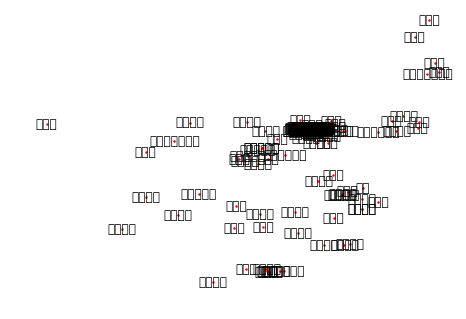

In [72]:
nx.draw(station_graph, station_location, with_labels=True, node_size=2)

直接爬虫发现地图画出来有些问题，再换一种方法试试

In [1]:
import numpy as np
import math
#百度经纬坐标转换
PI = math.pi

def _transformlat(coordinates):
    lng = coordinates[ : , 0] - 105
    lat = coordinates[ : , 1] - 35
    ret = -100 + 2 * lng + 3 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * np.sqrt(np.fabs(lng))
    ret += (20 * np.sin(6 * lng * PI) + 20 *
            np.sin(2 * lng * PI)) * 2 / 3
    ret += (20 * np.sin(lat * PI) + 40 *
            np.sin(lat / 3 * PI)) * 2 / 3
    ret += (160 * np.sin(lat / 12 * PI) + 320 *
            np.sin(lat * PI / 30.0)) * 2 / 3
    return ret


def _transformlng(coordinates):
    lng = coordinates[ : , 0] - 105
    lat = coordinates[ : , 1] - 35
    ret = 300 + lng + 2 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * np.sqrt(np.fabs(lng))
    ret += (20 * np.sin(6 * lng * PI) + 20 *
            np.sin(2 * lng * PI)) * 2 / 3
    ret += (20 * np.sin(lng * PI) + 40 *
            np.sin(lng / 3 * PI)) * 2 / 3
    ret += (150 * np.sin(lng / 12 * PI) + 300 *
            np.sin(lng / 30 * PI)) * 2 / 3
    return ret


def gcj02_to_wgs84(coordinates):
    """
    GCJ-02转WGS-84
    :param coordinates: GCJ-02坐标系的经度和纬度的numpy数组
    :returns: WGS-84坐标系的经度和纬度的numpy数组
    """
    ee = 0.006693421622965943  # 偏心率平方
    a = 6378245  # 长半轴
    lng = coordinates[ : , 0]
    lat = coordinates[ : , 1]
    is_in_china= (lng > 73.66) & (lng < 135.05) & (lat > 3.86) & (lat < 53.55)
    _transform = coordinates[is_in_china]  #只对国内的坐标做偏移
    
    dlat = _transformlat(_transform)
    dlng = _transformlng(_transform)
    radlat = _transform[ : , 1] / 180 * PI
    magic = np.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = np.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * PI)
    dlng = (dlng * 180.0) / (a / sqrtmagic * np.cos(radlat) * PI)
    mglat = _transform[ : , 1] + dlat
    mglng = _transform[ : , 0] + dlng
    coordinates[is_in_china] = np.array([
        _transform[ : , 0] * 2 - mglng, _transform[ : , 1] * 2 - mglat
    ]).T
    return coordinates


def bd09_to_gcj02(coordinates):
    """
    BD-09转GCJ-02
    :param coordinates: BD-09坐标系的经度和纬度的numpy数组
    :returns: GCJ-02坐标系的经度和纬度的numpy数组
    """
    x_pi = PI * 3000 / 180
    x = coordinates[ : , 0] - 0.0065
    y = coordinates[ : , 1] - 0.006
    z = np.sqrt(x * x + y * y) - 0.00002 * np.sin(y * x_pi)
    theta = np.arctan2(y, x) - 0.000003 * np.cos(x * x_pi)
    lng = z * np.cos(theta)
    lat = z * np.sin(theta)
    coordinates = np.array([lng, lat]).T
    return coordinates


def bd09_to_wgs84(coordinates):
    """
    BD-09转WGS-84
    :param coordinates: BD-09坐标系的经度和纬度的numpy数组
    :returns: WGS-84坐标系的经度和纬度的numpy数组
    """
    return gcj02_to_wgs84(bd09_to_gcj02(coordinates))


def mercator_to_bd09(mercator):
    """
    BD-09MC转BD-09
    :param coordinates: GCJ-02坐标系的经度和纬度的numpy数组
    :returns: WGS-84坐标系的经度和纬度的numpy数组
    """
    MCBAND = [12890594.86, 8362377.87, 5591021, 3481989.83, 1678043.12, 0]
    MC2LL = [[1.410526172116255e-08,   8.98305509648872e-06,    -1.9939833816331,        
              200.9824383106796,       -187.2403703815547,      91.6087516669843,
              -23.38765649603339,      2.57121317296198,        -0.03801003308653,
              17337981.2],
            [-7.435856389565537e-09,  8.983055097726239e-06,   -0.78625201886289,
             96.32687599759846,       -1.85204757529826,       -59.36935905485877,
             47.40033549296737,       -16.50741931063887,      2.28786674699375,
             10260144.86],
            [-3.030883460898826e-08,  8.98305509983578e-06,    0.30071316287616,
             59.74293618442277,       7.357984074871,          -25.38371002664745,
             13.45380521110908,       -3.29883767235584,       0.32710905363475,
             6856817.37],
            [-1.981981304930552e-08,  8.983055099779535e-06,   0.03278182852591,
             40.31678527705744,       0.65659298677277,        -4.44255534477492,
             0.85341911805263,        0.12923347998204,        -0.04625736007561,
             4482777.06], 
            [3.09191371068437e-09,    8.983055096812155e-06,   6.995724062e-05,
             23.10934304144901,       -0.00023663490511,       -0.6321817810242,
             -0.00663494467273,       0.03430082397953,        -0.00466043876332,
             2555164.4],  
            [2.890871144776878e-09,   8.983055095805407e-06,   -3.068298e-08,
             7.47137025468032,        -3.53937994e-06,         -0.02145144861037,
             -1.234426596e-05,        0.00010322952773,        -3.23890364e-06,
             826088.5]] 
    
    x = np.abs(mercator[ : , 0])
    y = np.abs(mercator[ : , 1])
    coef = np.array([
           MC2LL[index] for index in 
           (np.tile(y.reshape((-1, 1)), (1, 6)) < MCBAND).sum(axis=1)
    ])   
    return converter(x, y, coef)


def converter(x, y, coef):
    x_temp = coef[ : ,0] + coef[ : ,1] * np.abs(x)
    x_n = np.abs(y) / coef[ : ,9]
    y_temp = coef[ : ,2] + coef[ : ,3] * x_n + coef[ : ,4] * x_n ** 2 + \
             coef[ : ,5] * x_n ** 3 + coef[ : ,6] * x_n ** 4 + coef[ : ,7] * x_n ** 5 + \
             coef[ : ,8] * x_n ** 6
    x[x < 0] = -1
    x[x >= 0] = 1
    y[y < 0] = -1
    y[y >= 0] = 1    
    x_temp *= x
    y_temp *= y
    coordinates = np.array([x_temp, y_temp]).T
    return coordinates


In [2]:
import requests
import time

null = None #将json中的null定义为None
city_code = 131 #北京的城市编号
station_info = requests.get('http://map.baidu.com/?qt=bsi&c=%s&t=%s' % (
                    city_code, 
                    int(time.time() * 1000)
               )
)
station_info_json = eval(station_info.content) #将json字符串转为python对象
for railway in station_info_json['content']:
    uid = railway['line_uid']
    railway_json = requests.get(
        'https://map.baidu.com/?qt=bsl&tps=&newmap=1&uid=%s&c=%s' % (uid, city_code)
    )
    railway_json = eval(railway_json.content) #将json字符串转为python对象
    #......


In [3]:
trace_mercator = np.array(
        # 取出线路信息字典，以“|”划分后，取出第三部分信息，去掉末尾的“;”,获取BD-09MC坐标序列
        railway_json['content'][0]['geo'].split('|')[2][ : -1].split(','), 
        dtype=float
    ).reshape((-1, 2)) 
trace_coordinates = bd09_to_wgs84(mercator_to_bd09(trace_mercator))

In [11]:
railway_json['content'][0]['lineColor']

''

In [24]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode


mapbox_access_token = "pk.eyJ1IjoibHVrYXNtYXJ0aW5lbGxpIiwiYSI6ImNpem85dmhwazAyajIyd284dGxhN2VxYnYifQ.HQCmyhEXZUTz3S98FMrVAQ"
layout = go.Layout(
    autosize=True,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.9110666857, #广州市纬度
            lon= 116.4136103013 #广州市经度
        ),
        pitch=0,
        zoom=10
    ),
)

null = None #将json中的null定义为None
city_code = 131 #广州的城市编号
data = [] #绘制数据
marked = set()
for railway in station_info_json['content']:
    uid = railway['line_uid']
    if uid in marked: #由于线路包括了来回两个方向，需要排除已绘制线路的反向线路
        continue 
    railway_json = requests.get(
        'https://map.baidu.com/?qt=bsl&tps=&newmap=1&uid=%s&c=%s' % (uid, city_code)
    )
    railway_json = eval(railway_json.content) #将json字符串转为python对象
    trace_mercator = np.array(
        # 取出线路信息字典，以“|”划分后，取出第三部分信息，去掉末尾的“;”,获取BD-09MC坐标序列
        railway_json['content'][0]['geo'].split('|')[2][ : -1].split(','), 
        dtype=float
    ).reshape((-1, 2)) 
    trace_coordinates = bd09_to_wgs84(mercator_to_bd09(trace_mercator))
        
    plots = [] #站台BD-09MC坐标
    plots_name = [] #站台名称
    for plot in railway['stops']:
        plots.append([plot['x'], plot['y']])
        plots_name.append(plot['name'])
    plot_mercator = np.array(plots)
    plot_coordinates = bd09_to_wgs84(mercator_to_bd09(plot_mercator)) #站台经纬度
    
    if 'lineColor' in railway_json['content'][0]:
        color = railway_json['content'][0]['lineColor'] #利用json所给线路的颜色
    
    if not color:
        color = railway_json['content'][0]['line_color']
    
    data.extend([
        # 地铁路线
        go.Scattermapbox(
            lon=trace_coordinates[:, 0], #路线点经度
            lat=trace_coordinates[:, 1], #路线点纬度
            mode='lines',
            # 设置路线的参数
            line=go.scattermapbox.Line(
                width=2,
                color=color
            ),         
            name=railway['line_name'], #线路名称，显示在图例（legend）上
            legendgroup=railway['line_name']
        ),
        
        # 地铁站台
        go.Scattermapbox(
            lon=plot_coordinates[:, 0], #站台经度
            lat=plot_coordinates[:, 1], #站台纬度
            mode='markers',   
            text=plots_name,
            # 设置标记点的参数
            marker=go.scattermapbox.Marker(
                size=10,
                color=color
            ),
            name=railway['line_name'], #线路名称，显示在图例（legend）及鼠标悬浮在标记点时的路线名上
            legendgroup=railway['line_name'], #设置与路线同组，当隐藏该路线时隐藏标记点
            showlegend=False #不显示图例（legend)
        )
    ])
        
    marked.add(uid) #添加已绘制线路的uid
    marked.add(railway['pair_line_uid']) #添加已绘制线路反向线路的uid

fig = dict(data=data, layout=layout)
#py.iplot(fig) #直接显示地图
py.plot(fig, filename='北京地铁图.html') #生成html文件并打开


'北京地铁图.html'

In [77]:
import requests
import time

null = None #将json中的null定义为None
city_code = 131 #北京的城市编号
station_info = requests.get('http://map.baidu.com/?qt=bsi&c=%s&t=%s' % (
                    city_code, 
                    int(time.time() * 1000)
               )
)
station_info_json = eval(station_info.content) #将json字符串转为python对象


In [79]:
len(station_info_json)

2

In [56]:
station_stations = {}
for station, lines in station_lines.items():
    stations = []
    for line in lines:
        stations += lines_stations[line]
    p = set(stations)
    p.remove(station)
    station_stations[station] = list(p)

In [59]:
station_stations

{'苹果园站': ['东单站',
  '军事博物馆站',
  '国贸站',
  '复兴门站',
  '永安里站',
  '玉泉路站',
  '公主坟站',
  '建国门站',
  '五棵松站',
  '大望路站',
  '万寿路站',
  '天安门西站',
  '天安门东站',
  '四惠东站',
  '南礼士路站',
  '王府井站',
  '古城站',
  '木樨地站',
  '西单站',
  '八宝山站',
  '八角游乐园站',
  '四惠站'],
 '古城站': ['东单站',
  '军事博物馆站',
  '国贸站',
  '复兴门站',
  '永安里站',
  '玉泉路站',
  '公主坟站',
  '建国门站',
  '五棵松站',
  '大望路站',
  '万寿路站',
  '苹果园站',
  '天安门西站',
  '天安门东站',
  '四惠东站',
  '南礼士路站',
  '王府井站',
  '木樨地站',
  '西单站',
  '八宝山站',
  '八角游乐园站',
  '四惠站'],
 '八角游乐园站': ['东单站',
  '军事博物馆站',
  '国贸站',
  '复兴门站',
  '永安里站',
  '玉泉路站',
  '公主坟站',
  '建国门站',
  '五棵松站',
  '大望路站',
  '万寿路站',
  '苹果园站',
  '天安门西站',
  '天安门东站',
  '四惠东站',
  '南礼士路站',
  '王府井站',
  '古城站',
  '木樨地站',
  '西单站',
  '八宝山站',
  '四惠站'],
 '八宝山站': ['东单站',
  '军事博物馆站',
  '国贸站',
  '复兴门站',
  '永安里站',
  '玉泉路站',
  '公主坟站',
  '建国门站',
  '五棵松站',
  '大望路站',
  '万寿路站',
  '苹果园站',
  '天安门西站',
  '天安门东站',
  '四惠东站',
  '南礼士路站',
  '王府井站',
  '古城站',
  '木樨地站',
  '西单站',
  '八角游乐园站',
  '四惠站'],
 '玉泉路站': ['东单站',
  '军事博物馆站',
  '国贸站',
  '复兴门站',
  '永安里站',
  '公主坟站',
  '建国门站'

In [94]:
from collections import defaultdict
station_connection = defaultdict(list)

In [95]:
station_connection.update(station_stations)

In [97]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            #print(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        #pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [98]:
print(search('亦庄火车站','苏庄站',station_connection))

['亦庄火车站', '宋家庄站', '六里桥站', '郭公庄站', '苏庄站']


In [100]:
print(search('北沙滩站','亦庄火车站',station_connection))

['北沙滩站', '大屯路东站', '宋家庄站', '亦庄火车站']


In [101]:
print(search('奥体中心站','天安门站',station_connection))

None


##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)